In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # comment this line if you don't want to use seaborn for plots
from scipy.optimize import curve_fit

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
#sys.path.append('./abcTau')
sys.path.append('C:\\Users\\ipochino\\.conda\\envs\\isttc\\Lib\\site-packages\\abcTau') # IP: replaced previous line with that; relative path was not working
import abcTau

### Checking example data from abcTau package

In [2]:
abc_tau_folder = 'D:\\intr_timescales\\abcTau-master\\'
dataload_path = abc_tau_folder + 'example_data/'
isttc_results_folder_path = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\'

In [36]:
# load data time-series as a numpy array (numTrials * time-points)
filename = 'OU_tau100_T1000_fs1000_trials500'
data_load = np.load(dataload_path + filename + '.npy')

# select summary statistics metric
summStat_metric = 'comp_ac_fft'
ifNorm = True # if normalize the autocorrelation or PSD

# extract statistics from real data
deltaT = 1 # temporal resolution of data.
binSize = 1 #  bin-size for binning data and computing the autocorrelation.
disp = None # put the dispersion parameter if computed with grid-search
maxTimeLag = 50 # only used when using autocorrelation for summary statistics
data_sumStat, data_mean, data_var, T, numTrials =  abcTau.preprocessing.extract_stats(data_load, deltaT, binSize,\
                                                                                  summStat_metric, ifNorm, maxTimeLag)

print('data_sumStat {}, data_mean {}, data_var {}, T {}, numTrials {}'.format(data_sumStat, data_mean, data_var, T, numTrials))

data_sumStat [1.         0.98785362 0.9756785  0.96355076 0.95157571 0.93969126
 0.92795995 0.9163697  0.90488991 0.89351306 0.88222469 0.87107754
 0.86006359 0.8491395  0.83826526 0.82749278 0.81671932 0.80606016
 0.79545144 0.78498191 0.77456742 0.76424464 0.75406379 0.74398291
 0.73392725 0.72397581 0.71414911 0.70448465 0.69495924 0.68557941
 0.67624115 0.66703597 0.65789657 0.64886848 0.6399472  0.63110031
 0.62242827 0.61385553 0.60533383 0.59689817 0.58851076 0.58024193
 0.57202606 0.56390655 0.55587959 0.54794783 0.5401249  0.53243343
 0.52481463 0.51723244], data_mean -0.011069706655934675, data_var 0.8369371631495883, T 1000, numTrials 500


In [37]:
gt_tau = 100 # ground-truth timescale

# fit 
popt, poptcov = abcTau.preprocessing.fit_oneTauExponential(data_sumStat, binSize, maxTimeLag)
tau = popt[1]
print(tau)

74.80885566709374


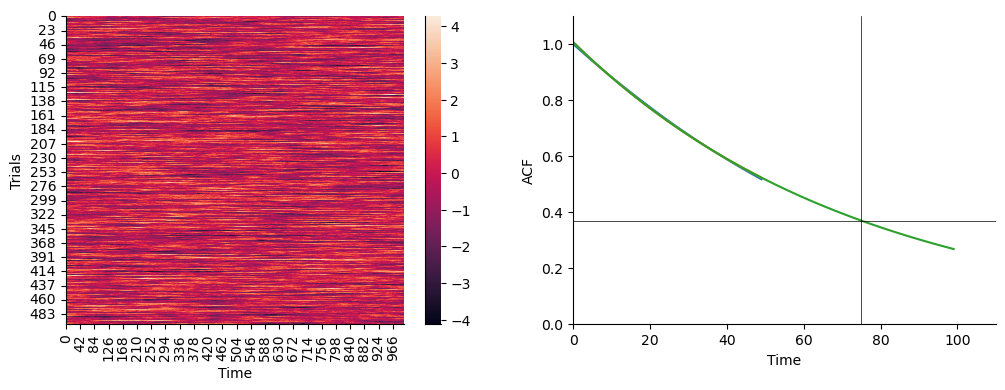

In [40]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.heatmap(data_load, ax=axes[0]) # is it z-scored binned data?
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Trials')

axes[1].plot(data_sumStat)
axes[1].plot(single_exp(xdata, popt[0], popt[1]))
axes[1].plot(single_exp(np.arange(0, maxTimeLag+maxTimeLag, binSize), popt[0], popt[1]))
axes[1].axvline(x=popt[1], lw=0.5, c='k')
axes[1].axhline(y=1/np.e, lw=0.5, c='k')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('ACF')

axes[1].set_ylim([0,1.1])
axes[1].set_xlim([0,110])

sns.despine()

In [21]:
# can get the same result as the fit_oneTauExponential function
# def single_exp(time, a, tau):
#     """a single expoenetial decay function.

#     Parameters
#     -----------
#     time : 1d array
#         time points.
#     a : float
#         amplitude of autocorrelation at lag 0. 
#     tau : float
#        timescale.
    
    
#     Returns
#     -------
#     exp_func : 1d array
#         single expoenetial decay function.
#     """
#     exp_func = a * np.exp(-time/tau) 
#     return exp_func

# xdata = np.arange(0, maxTimeLag, binSize)
# ydata = data_sumStat
# popt, pcov = curve_fit(single_exp, xdata, ydata, maxfev = 2000)

### Generating data

<Axes: >

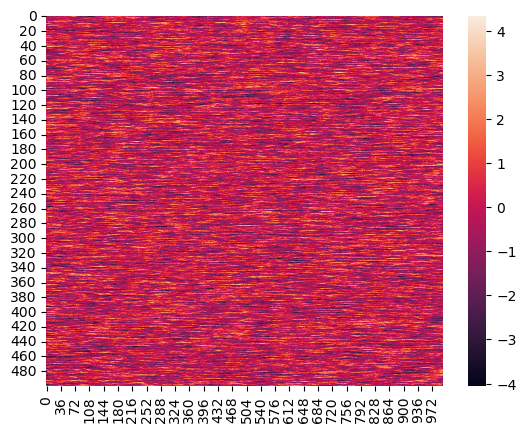

In [9]:
theta = np.array([20])
generativeModel = 'oneTauOU'
syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                             '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
sns.heatmap(syn_data) # is it z-scored binned data?

<Axes: >

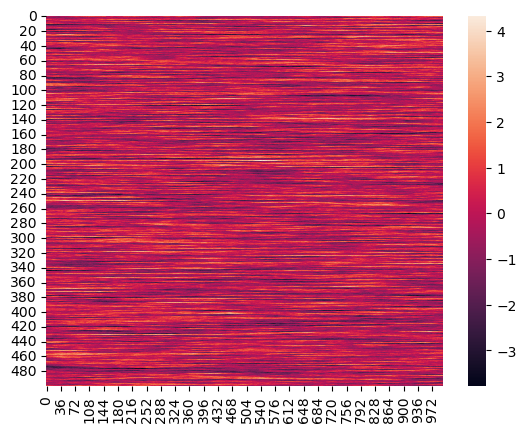

In [10]:
theta = np.array([150])
generativeModel = 'oneTauOU'
syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                             '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
sns.heatmap(syn_data) # is it z-scored binned data?

<Axes: >

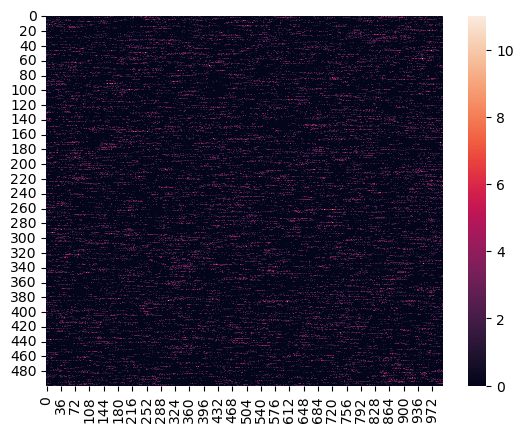

In [11]:
theta = np.array([20])
generativeModel = 'oneTauOU_poissonSpikes'
syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                             '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
sns.heatmap(syn_data) 

<Axes: >

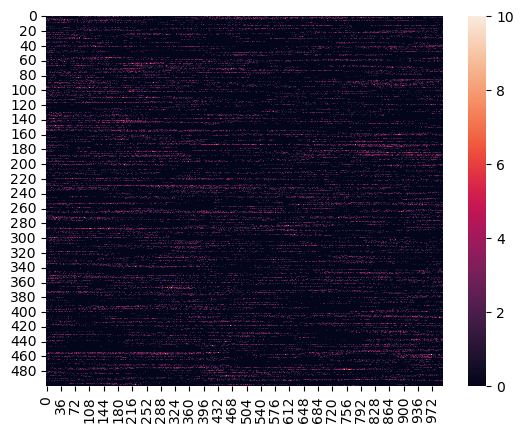

In [12]:
theta = np.array([150])
#disp=1
generativeModel = 'oneTauOU_poissonSpikes'
syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                             '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
sns.heatmap(syn_data) 